<a href="https://colab.research.google.com/github/sidhanth123/Air-Quality-Measures/blob/main/Air_Quality_Measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_air = pd.read_csv('/content/Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv')

In [3]:
df_air.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1.0,Alabama,1027.0,Clay,1999.0,33.0,No Units,No Units,Monitor Only,1.0
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1.0,Alabama,1051.0,Elmore,1999.0,5.0,No Units,No Units,Monitor Only,1.0
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1.0,Alabama,1073.0,Jefferson,1999.0,39.0,No Units,No Units,Monitor Only,1.0
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1.0,Alabama,1079.0,Lawrence,1999.0,28.0,No Units,No Units,Monitor Only,1.0
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1.0,Alabama,1089.0,Madison,1999.0,31.0,No Units,No Units,Monitor Only,1.0


In [19]:
clean_air = df_air[[
    "MeasureId", "MeasureName", "MeasureType",
    "StateName", "CountyName", "ReportYear", "Value"
]]

In [20]:
clean_file_path = "/content/Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv"
clean_air.to_csv(clean_file_path, index=False)

clean_file_path

'/content/Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv'

In [21]:
df_air.isnull()

,MeasureId,MeasureName,MeasureType,StateName,CountyName,ReportYear,Value
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
113203,False,False,False,False,False,False,False
113204,False,False,False,False,False,False,False
113205,False,False,False,False,False,False,False
113206,False,False,False,False,False,False,False


In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df_air['Value'], bins=50, kde=True)
plt.title('Distribution of Air Quality Measure Values')
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.yscale('log')
plt.savefig('value_distribution.png')
plt.close()

In [23]:
yearly_avg_value = df_air.groupby('ReportYear')['Value'].mean().reset_index()

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_value, x='ReportYear', y='Value')
plt.title('Average Air Quality Measure Value Over Years')
plt.xlabel('Report Year')
plt.ylabel('Average Value')
plt.grid(True)
plt.savefig('average_value_over_years.png')
plt.close()

In [25]:
avg_value_by_measure = df_air.groupby('MeasureName')['Value'].mean().reset_index()

/tmp/ipython-input-3839484814.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_value_by_measure, x='Value', y='MeasureName', palette='viridis')


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

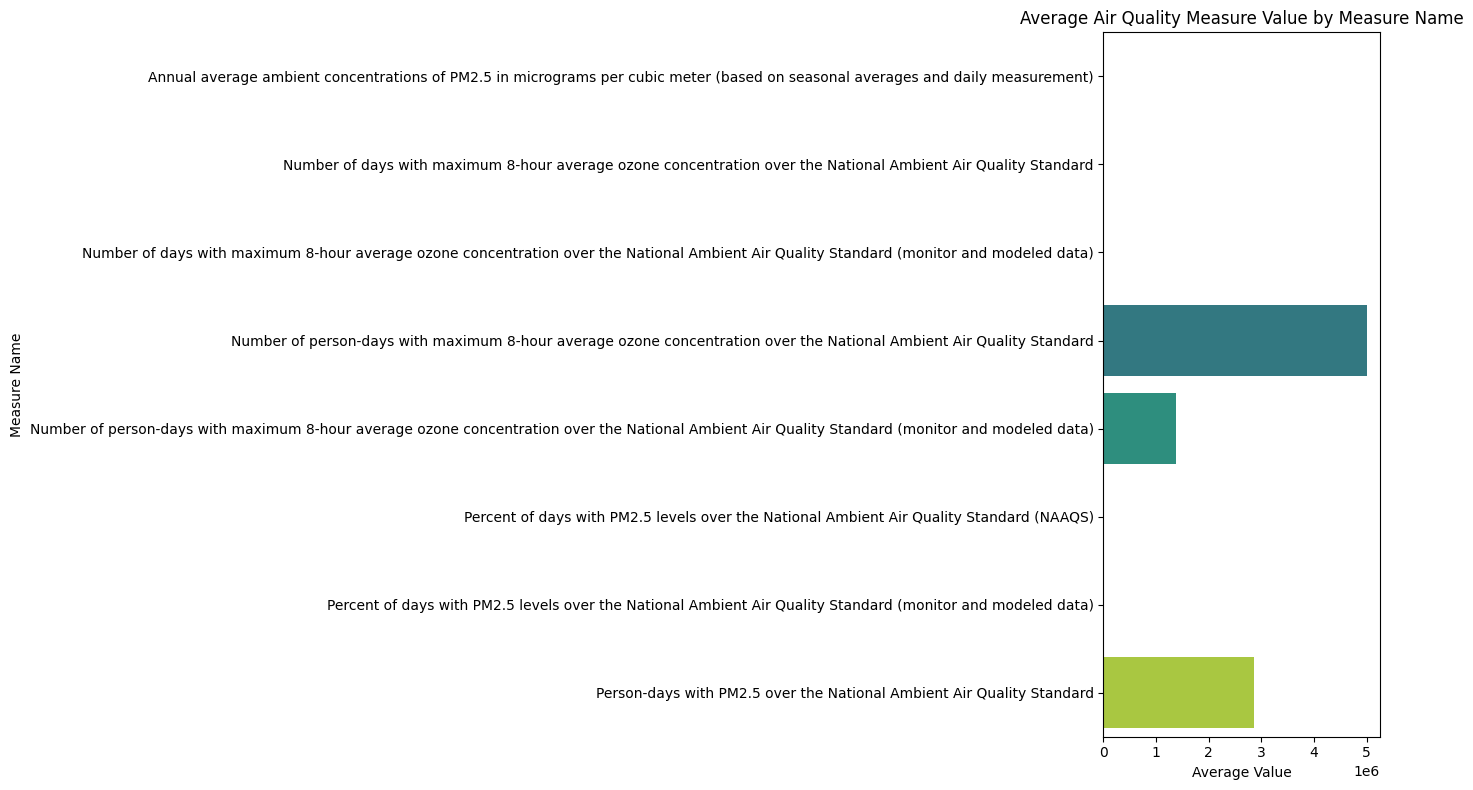

In [26]:
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_value_by_measure, x='Value', y='MeasureName', palette='viridis')
plt.title('Average Air Quality Measure Value by Measure Name')
plt.xlabel('Average Value')
plt.ylabel('Measure Name')
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.savefig('average_value_by_measure_name.png')
plt.close

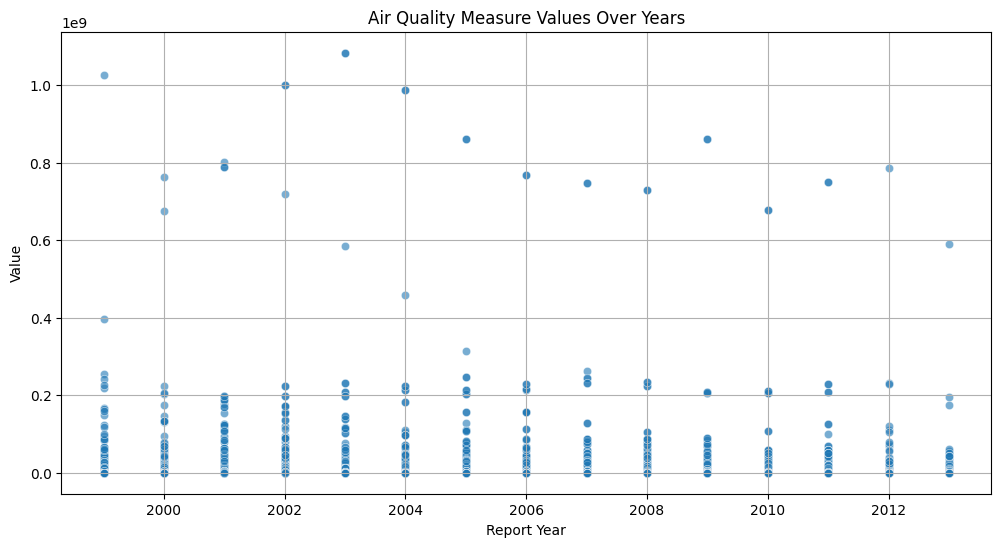

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_air, x='ReportYear', y='Value', alpha=0.6)
plt.title('Air Quality Measure Values Over Years')
plt.xlabel('Report Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [28]:
avg_value_by_state = df_air.groupby('StateName')['Value'].mean().reset_index()
top_10_states = avg_value_by_state.sort_values(by='Value', ascending=False).head(10)

In [29]:
plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_states, x='Value', y='StateName', palette='viridis')
plt.title('Top 10 States by Average Air Quality Measure Value')
plt.xlabel('Average Value')
plt.ylabel('State Name')
plt.tight_layout()
plt.savefig('top_10_states_by_avg_value.png')
plt.close()

/tmp/ipython-input-686413176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_states, x='Value', y='StateName', palette='viridis')


In [30]:
bottom_10_states = avg_value_by_state.tail(10).reset_index()

In [31]:
plt.figure(figsize=(12, 7))
sns.barplot(data=bottom_10_states, x='Value', y='StateName', palette='magma')
plt.title('Bottom 10 States by Average Air Quality Measure Value')
plt.xlabel('Average Value')
plt.ylabel('State Name')
plt.tight_layout()
plt.savefig('bottom_10_states_by_avg_value.png')
plt.close()

/tmp/ipython-input-873081786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_states, x='Value', y='StateName', palette='magma')


In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_air['Value'])
plt.title('Distribution of Air Quality Measure Values (Boxplot)')
plt.xlabel('Value')
plt.savefig('value_boxplot.png')
plt.close()

In [33]:
correlation_matrix = df_air.select_dtypes(include=['number']).corr()
display(correlation_matrix)

,MeasureId,ReportYear,Value
MeasureId,1.000000,0.000963,-0.031578
ReportYear,0.000963,1.000000,-0.025473
Value,-0.031578,-0.025473,1.000000


In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation_heatmap.png')
plt.close()

In [13]:
unique_measure_names = df_air['MeasureName'].unique().tolist()
display(unique_measure_names)

['Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard',
 'Percent of days with PM2.5 levels over the National Ambient Air Quality Standard (NAAQS)',
 'Person-days with PM2.5 over the National Ambient Air Quality Standard',
 'Number of person-days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard',
 'Annual average ambient concentrations of PM2.5 in micrograms per cubic meter (based on seasonal averages and daily measurement)',
 'Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data)',
 'Number of person-days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data)',
 'Percent of days with PM2.5 levels over the National Ambient Air Quality Standard (monitor and modeled data)']

In [14]:
print("Please select one MeasureName from the list displayed previously for the time series plot.")
print("Please provide the exact MeasureName you would like to visualize.")

Please select one MeasureName from the list displayed previously for the time series plot.
Please provide the exact MeasureName you would like to visualize.


In [15]:
selected_measure_name = "Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard"
df_filtered_measure = df_air[df_air['MeasureName'] == selected_measure_name].copy()
display(df_filtered_measure.head())

,MeasureId,MeasureName,MeasureType,StateName,CountyName,ReportYear,Value
0,83,Number of days with maximum 8-hour average ozo...,Counts,Alabama,Clay,1999.0,33.0
1,83,Number of days with maximum 8-hour average ozo...,Counts,Alabama,Elmore,1999.0,5.0
2,83,Number of days with maximum 8-hour average ozo...,Counts,Alabama,Jefferson,1999.0,39.0
3,83,Number of days with maximum 8-hour average ozo...,Counts,Alabama,Lawrence,1999.0,28.0
4,83,Number of days with maximum 8-hour average ozo...,Counts,Alabama,Madison,1999.0,31.0


In [16]:
yearly_avg_measure_value = df_filtered_measure.groupby('ReportYear')['Value'].mean().reset_index()
display(yearly_avg_measure_value.head())

,ReportYear,Value
0,1999.0,21.553448
1,2000.0,12.691680
2,2001.0,13.273302
3,2002.0,18.651306
4,2003.0,9.543704


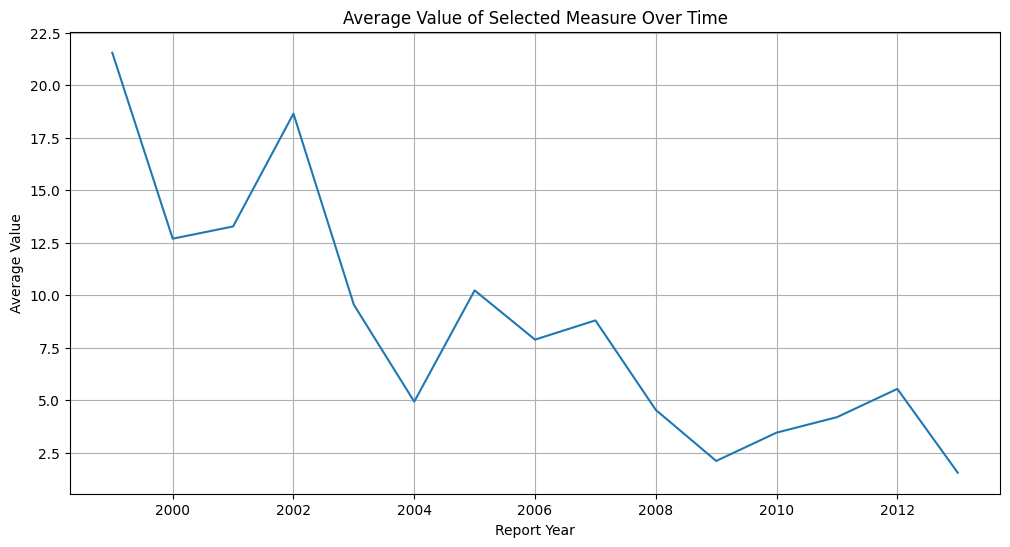

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_measure_value, x='ReportYear', y='Value')
plt.title('Average Value of Selected Measure Over Time')
plt.xlabel('Report Year')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

In [18]:
print("A time series plot for the selected measure has been generated.")
print("Would you like to generate time series plots for other measures?")
print("If yes, please provide the exact MeasureName from the list displayed previously for the next plot.")

A time series plot for the selected measure has been generated.
Would you like to generate time series plots for other measures?
If yes, please provide the exact MeasureName from the list displayed previously for the next plot.
